In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#  Step 2: Load the Dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Advertising.csv")  
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [6]:
# Step 3: Basic EDA
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Summary Statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   

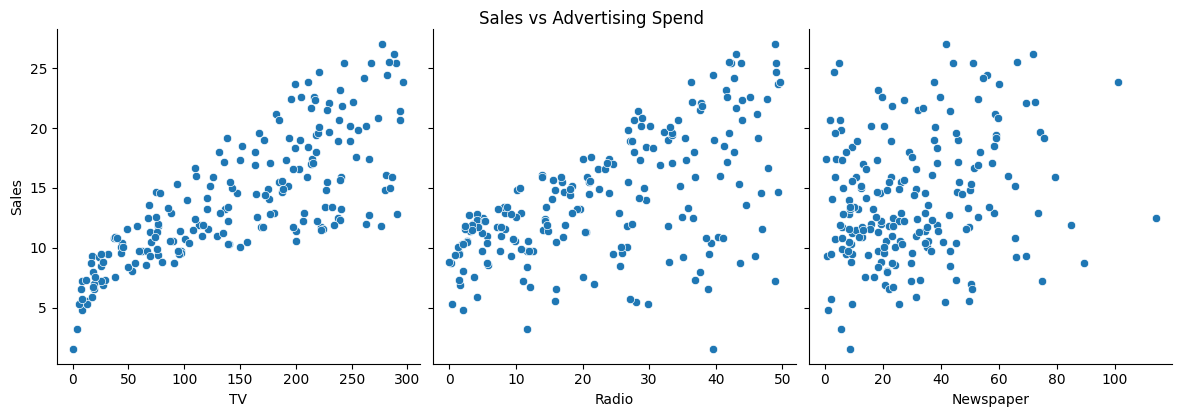

In [7]:
# Step 4: Visualizations
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, kind='scatter')
plt.suptitle("Sales vs Advertising Spend", y=1.02)
plt.show()

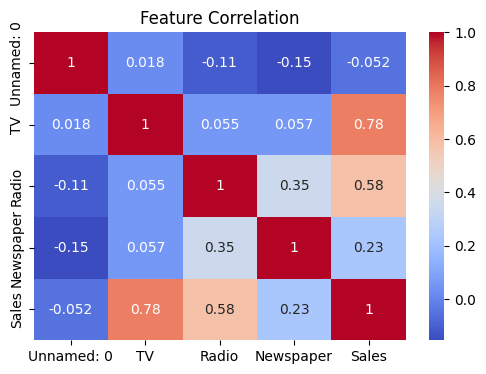

In [8]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [10]:
# Step 5: Prepare Data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Step 6: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 7: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Step 8: Evaluate the Model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 3.17
R² Score: 0.90


In [15]:
# Step 9: Show Coefficients
print("\nModel Coefficients:")
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


Model Coefficients:
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


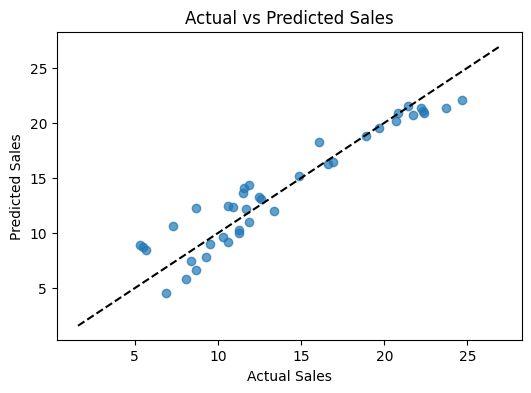

In [16]:
# Step 10: Plot Predictions vs Actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [20]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, rf_pred))


# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost R² Score:", r2_score(y_test, xgb_pred))

Random Forest R² Score: 0.9812843792541843
XGBoost R² Score: 0.9753082787568474


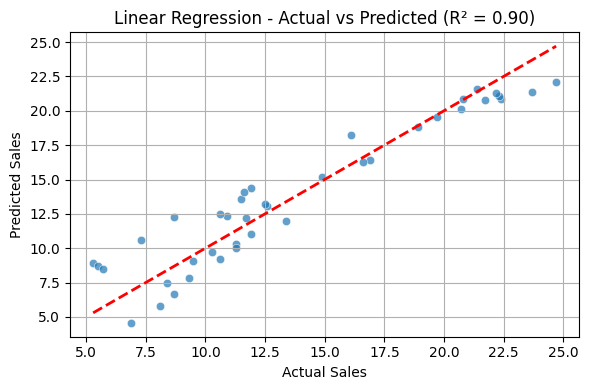

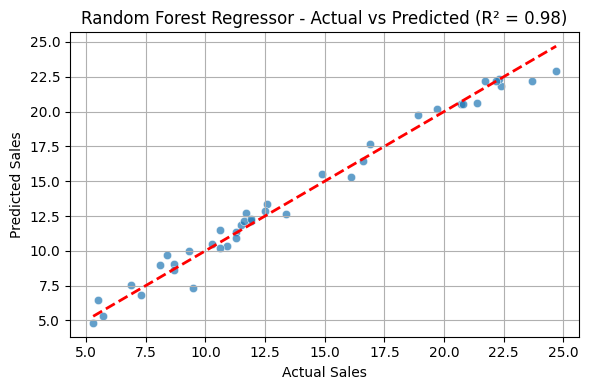

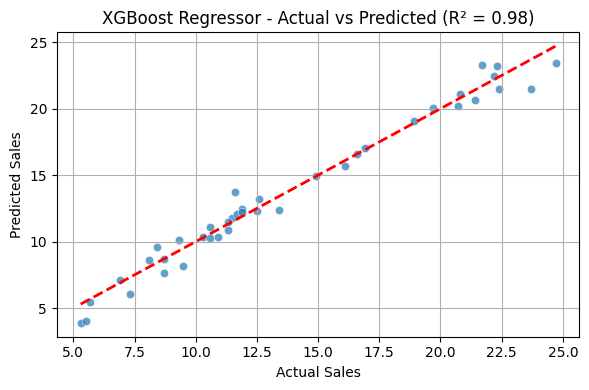

In [28]:
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{model_name} - Actual vs Predicted (R² = {r2_score(y_test, y_pred):.2f})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_predictions(y_test, y_pred, "Linear Regression")
plot_predictions(y_test, rf_pred, "Random Forest Regressor")
plot_predictions(y_test, xgb_pred, "XGBoost Regressor")

